In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-05-13 13:03:51--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.169.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.169.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  14.3MB/s    in 2m 2s   

2021-05-13 13:05:54 (12.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

In [ ]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from string import punctuation
from gensim.models import KeyedVectors


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [ ]:
style.use('seaborn-poster')
style.use('ggplot')

In [ ]:
with open('/content/drive/My Drive/Movie_genre_prediction_dataset/train_np_imgs_norm','rb') as f: X_img_train = pickle.load(f)
X_img_train.shape

(29568, 64, 64, 3)

In [ ]:
with open('/content/drive/My Drive/Movie_genre_prediction_dataset/test_np_imgs_norm', 'rb') as f: X_img_test = pickle.load(f)
X_img_test.shape

(8214, 64, 64, 3)

In [ ]:
with open('/content/drive/My Drive/Movie_genre_prediction_dataset/val_np_img_norm', 'rb') as f: X_img_val = pickle.load(f)
X_img_val.shape

(3286, 64, 64, 3)

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/Movie_genre_prediction_dataset/dataset_mod.csv")
train = pd.read_csv("/content/drive/My Drive/Movie_genre_prediction_dataset/train_data.csv")
test = pd.read_csv("/content/drive/My Drive/Movie_genre_prediction_dataset/test_data.csv")
val = pd.read_csv("/content/drive/My Drive/Movie_genre_prediction_dataset/val_data.csv")


In [ ]:
dataset['genre_list'] = dataset['genre_list'].apply(lambda x: ast.literal_eval(x))
train['genre_list'] = train['genre_list'].apply(lambda x: ast.literal_eval(x))
test['genre_list'] = test['genre_list'].apply(lambda x: ast.literal_eval(x))
val['genre_list'] = val['genre_list'].apply(lambda x: ast.literal_eval(x))

In [ ]:
mlb = MultiLabelBinarizer()
mlb.fit(dataset['genre_list'].tolist())
mlb.classes_


array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'], dtype=object)

In [ ]:
transformed_labels = mlb.fit_transform(dataset['genre_list'].tolist())
transformed_labels.shape


(41069, 18)

In [ ]:
train_labels = mlb.transform(train['genre_list'].tolist())
train_labels.shape

(29568, 18)

In [ ]:
test_labels = mlb.transform(test['genre_list'].tolist())
test_labels.shape

(8214, 18)

In [ ]:
val_labels = mlb.transform(val['genre_list'].tolist())
val_labels.shape

(3286, 18)

In [ ]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = text.translate(str.maketrans('', '', punctuation))
  text = text.lower().strip()
  text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
  text = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
  text = re.sub(r"\s{2,}", " ", text)
  return text

train['overview'] = train['overview'].astype(str)
test['overview'] = test['overview'].astype(str)
val['overview'] = val['overview'].astype(str)

train['overview'] = train['overview'].apply(lambda text: clean_text(text))
test['overview'] = test['overview'].apply(lambda text: clean_text(text))
val['overview'] = val['overview'].apply(lambda text: clean_text(text))


In [ ]:
dataset['overview'] = dataset['overview'].astype(str)
dataset['overview'] = dataset['overview'].apply(lambda text: clean_text(text))

In [ ]:
!pip install tensorflow-gpu 

In [ ]:
!pip install tf-nightly 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1269264273696373089, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11154422528
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13521132844033706828
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [ ]:

MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = dataset['overview'].map(len).max()
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(dataset['overview'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Max len:', MAX_SEQUENCE_LENGTH)

Found 75371 unique tokens.
Max len: 868


In [ ]:
X_text_train = tokenizer.texts_to_sequences(train['overview'].values)
X_text_train = pad_sequences(X_text_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_train.shape)

X_text_test = tokenizer.texts_to_sequences(test['overview'].values)
X_text_test = pad_sequences(X_text_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_test.shape)

X_text_val = tokenizer.texts_to_sequences(val['overview'].values)
X_text_val = pad_sequences(X_text_val, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_val.shape)

Shape of train tensor: (29568, 868)
Shape of train tensor: (8214, 868)
Shape of train tensor: (3286, 868)


In [ ]:
def get_embedding_matrix():
  word2vecDict = KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True)
  embed_size = 300
  unique_words = len(word_index)
  total_words = unique_words + 1
  skipped_words = 0
        
  embedding_matrix = np.zeros((total_words, embed_size))

  for word, index in word_index.items():
   try:
     embedding_vector = word2vecDict[word]
   except:
     skipped_words = skipped_words + 1
   if embedding_vector is not None:
     embedding_matrix[index] = embedding_vector
        
  print("Skipped words : " + str(skipped_words))
        
  return embedding_matrix

In [ ]:
word2vec_embedding_matrix = get_embedding_matrix()

Skipped words : 39855


In [ ]:
word2vec_embedding_matrix.shape

(75372, 300)

In [ ]:
def compile_model(embedding_matrix):
  lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights=[embedding_matrix], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
  x = LSTM(64, return_sequences = True)(x)
  x = LSTM(64)(x)
  lstm_out = Dense(18, activation = 'relu')(x)

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  cnn_out = Dense(512, activation='relu')(y)

  concat_inp = concatenate([cnn_out, lstm_out])
  z = Dense(256, activation='relu')(concat_inp)
  z = Dropout(0.3)(z)
  z = Dense(128, activation='relu')(z)
  z = Dropout(0.3)(z)
  output = Dense(train_labels.shape[1], activation='sigmoid')(z)

  model = Model(inputs=[cnn_input, lstm_input], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [ ]:
word2vec_model = compile_model(word2vec_embedding_matrix)
word2vec_model.summary()

64 64 3
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 31, 31, 32)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 29, 29, 64)   18496       max_pooling2d_4[0][0]            
____________________________________________________________________________________

In [ ]:
es = EarlyStopping(patience=5)
csv_logger = CSVLogger('/content/drive/My Drive/Movie_genre_prediction_dataset/model_history_log_model_lstm.csv', append=True)
check_point = ModelCheckpoint(filepath='/content/drive/My Drive/Movie_genre_prediction_dataset/best_lstm_model_todate', save_best_only=True, save_weights_only=True)

In [ ]:
word2vec_multi_modal_model = word2vec_model.fit([X_img_train, X_text_train], train_labels, batch_size=256, epochs=20,
                            validation_data=([X_img_val, X_text_val], val_labels), callbacks = [es, csv_logger, check_point])


Epoch 1/20
116/116 [==============================] - 661s 5s/step - loss: 0.3839 - accuracy: 0.2303 - val_loss: 0.2804 - val_accuracy: 0.3281
Epoch 2/20
116/116 [==============================] - 611s 5s/step - loss: 0.2812 - accuracy: 0.3433 - val_loss: 0.2538 - val_accuracy: 0.3725
Epoch 3/20
116/116 [==============================] - 598s 5s/step - loss: 0.2570 - accuracy: 0.3956 - val_loss: 0.2418 - val_accuracy: 0.4233
Epoch 4/20
116/116 [==============================] - 593s 5s/step - loss: 0.2437 - accuracy: 0.4360 - val_loss: 0.2315 - val_accuracy: 0.4845
Epoch 5/20
116/116 [==============================] - 596s 5s/step - loss: 0.2335 - accuracy: 0.4754 - val_loss: 0.2274 - val_accuracy: 0.4918
Epoch 6/20
116/116 [==============================] - 595s 5s/step - loss: 0.2277 - accuracy: 0.4862 - val_loss: 0.2262 - val_accuracy: 0.4550
Epoch 7/20
116/116 [==============================] - 595s 5s/step - loss: 0.2221 - accuracy: 0.4884 - val_loss: 0.2236 - val_accuracy: 0.4967

In [ ]:
word2vec_model.save('/content/drive/My Drive/Movie_genre_prediction_dataset/64_45.h5')

In [ ]:
word2vec_model = load_model("/content/drive/My Drive/Movie_genre_prediction_dataset/64_45.h5")

In [ ]:
import tensorflow
print(tensorflow.__version__)


2.4.1


In [ ]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_acc(history):
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
  plt.show()

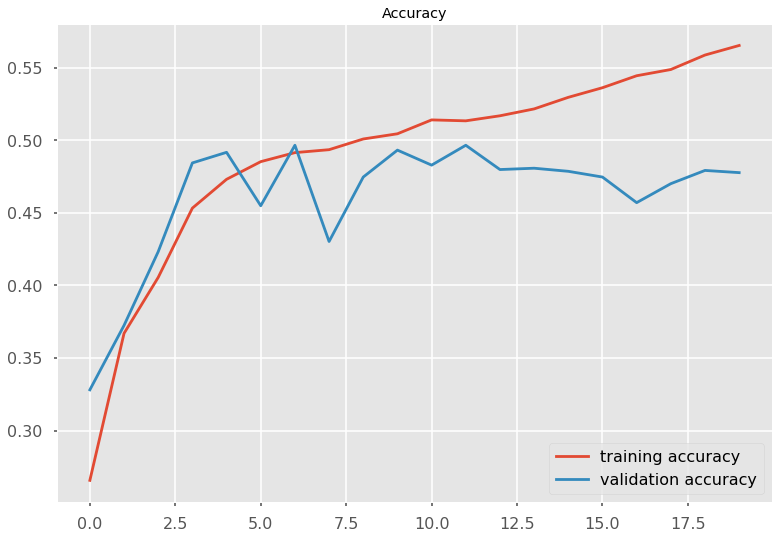

In [ ]:

plot_acc(word2vec_multi_modal_model)

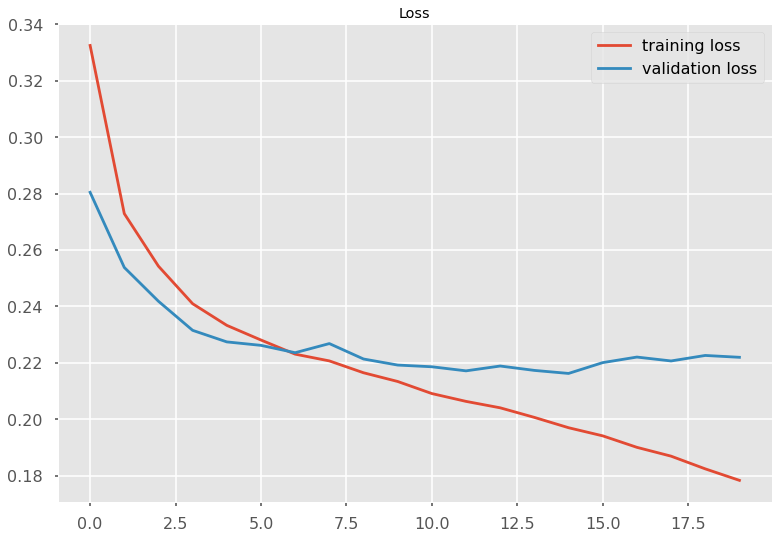

In [ ]:

plot_loss(word2vec_multi_modal_model)

In [ ]:
loss, acc = word2vec_model.evaluate([X_img_test, X_text_test], test_labels, batch_size=16)
print("word2vec model:", loss, acc)

514/514 [==============================] - 175s 335ms/step - loss: 0.2232 - accuracy: 0.4724
word2vec model: 0.22315344214439392 0.47236424684524536


In [ ]:
out = word2vec_model.predict([X_img_test, X_text_test], batch_size=256)


In [ ]:
roc_auc = roc_auc_score(test_labels, out)
print(roc_auc)

0.8734835137324075


In [ ]:
y_pred = np.zeros(out.shape)
y_pred[out>0.5]=1
y_pred = np.array(y_pred)

In [ ]:
hl = hamming_loss(test_labels,y_pred)
score = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels,y_pred, average = 'samples')
recall = recall_score(test_labels,y_pred, average = 'samples')
f1 = f1_score(test_labels,y_pred, average = 'samples')
print("Hamming loss:", hl)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

Hamming loss: 0.08920406893379866
score: 0.2293644996347699
Precision: 0.664994724454184
Recall: 0.5621650608137094
F1_score: 0.5705371394560583


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import matthews_corrcoef
y_test = test_labels
y_pred = np.zeros(out.shape)
y_pred = np.array(y_pred) 
threshold = np.arange(0.01, 0.90, 0.20)

acc = []
accuracies = []
best_threshold = np.zeros(out.shape[1])
for i in range(out.shape[1]):
  y_prob = np.array(out[:,i])
  for j in threshold:
    y_pred = [1 if prob>=j else 0 for prob in y_prob]
    y_pred = np.array(y_pred)
    mcc = matthews_corrcoef(y_test[:,i],y_pred)
    acc.append(mcc)
  acc   = np.array(acc)
  index = np.where(acc==acc.max())
  accuracies.append(acc.max())
  best_threshold[i] = threshold[index[0][0]]
  acc = []

y_pred = np.array([[1 if out[i,j]>=best_threshold[j] else 0 for j in range(y_test.shape[1])] for i in range(len(y_test))])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
preds = np.transpose(y_pred)
labels = np.transpose(test_labels)

Action
accuracy: 0.8553688823959095 precision: 0.5435714285714286 recall: 0.5809160305343511 f1: 0.5616236162361624


<Figure size 921.6x633.6 with 0 Axes>

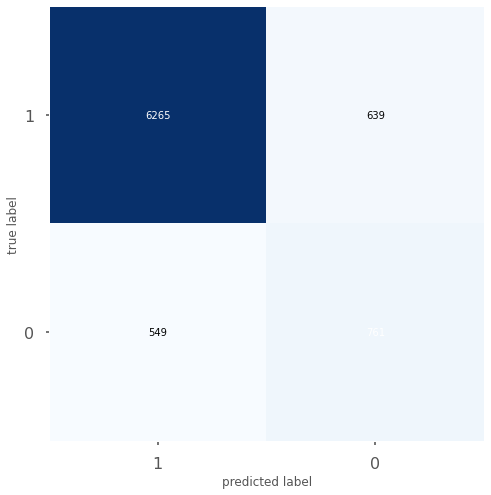

Adventure
accuracy: 0.8531775018261505 precision: 0.31136363636363634 recall: 0.5805084745762712 f1: 0.4053254437869822


<Figure size 921.6x633.6 with 0 Axes>

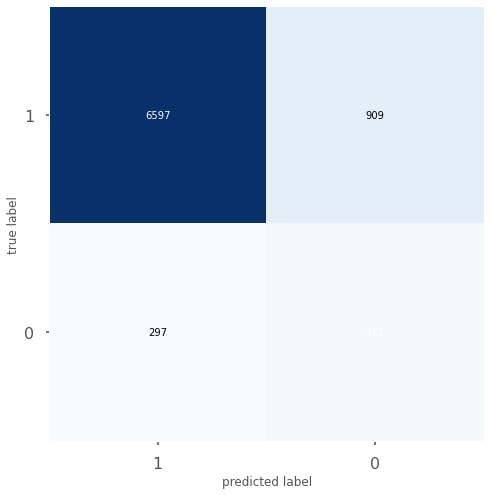

Animation
accuracy: 0.9414414414414415 precision: 0.42439862542955326 recall: 0.628498727735369 f1: 0.5066666666666667


<Figure size 921.6x633.6 with 0 Axes>

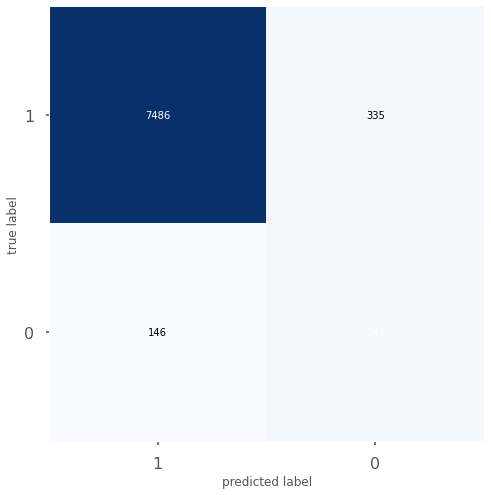

Comedy
accuracy: 0.7835402970538106 precision: 0.6590038314176245 recall: 0.6130693069306931 f1: 0.6352072219942553


<Figure size 921.6x633.6 with 0 Axes>

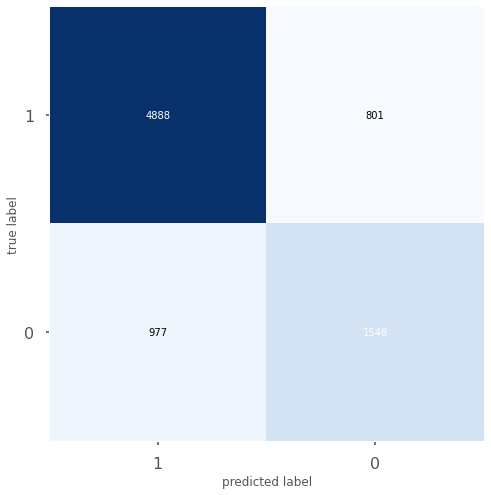

Crime
accuracy: 0.8679084489895301 precision: 0.4153616703952274 recall: 0.6491841491841492 f1: 0.506593906321055


<Figure size 921.6x633.6 with 0 Axes>

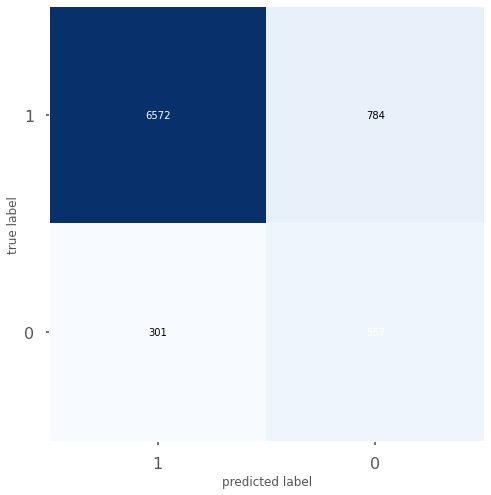

Documentary
accuracy: 0.956172388604821 precision: 0.7356902356902357 recall: 0.6828125 f1: 0.7082658022690438


<Figure size 921.6x633.6 with 0 Axes>

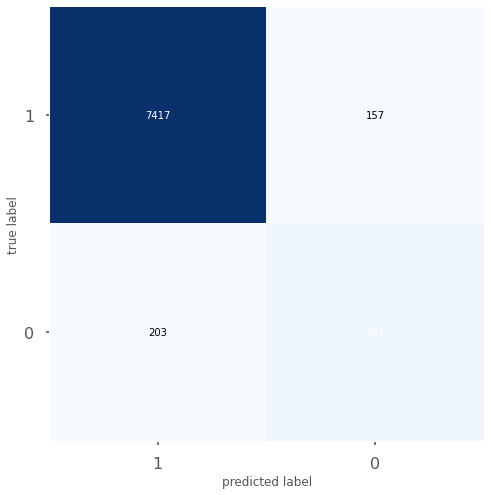

Drama
accuracy: 0.7152422692963234 precision: 0.6707692307692308 recall: 0.7839712304135628 f1: 0.7229657704607367


<Figure size 921.6x633.6 with 0 Axes>

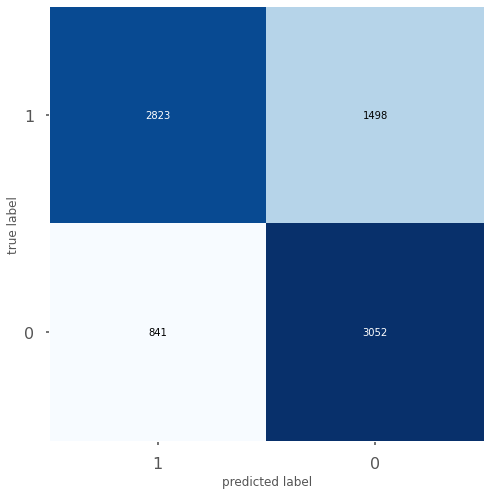

Family
accuracy: 0.9416849281714147 precision: 0.5953002610966057 recall: 0.41304347826086957 f1: 0.4877005347593583


<Figure size 921.6x633.6 with 0 Axes>

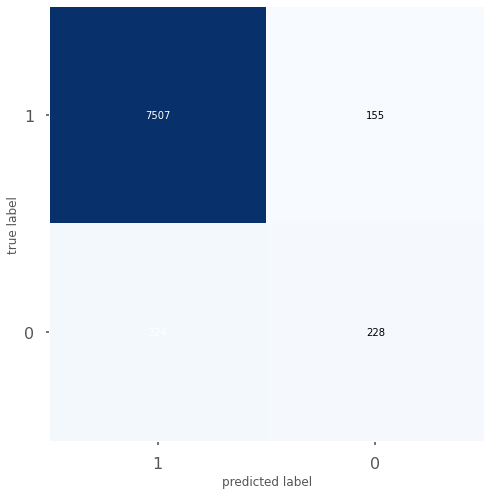

Fantasy
accuracy: 0.914536157779401 precision: 0.3230769230769231 recall: 0.5144766146993318 f1: 0.3969072164948454


<Figure size 921.6x633.6 with 0 Axes>

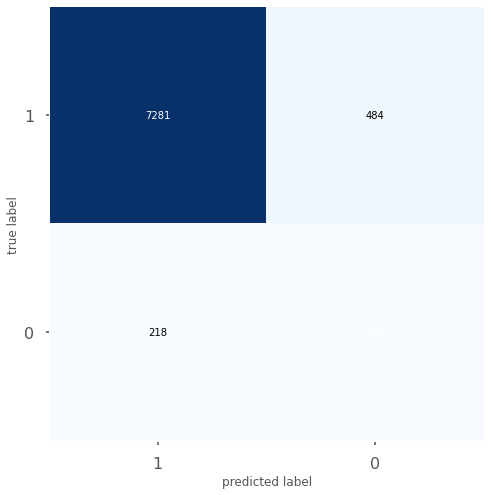

History
accuracy: 0.9258582907231556 precision: 0.2193877551020408 recall: 0.46236559139784944 f1: 0.29757785467128023


<Figure size 921.6x633.6 with 0 Axes>

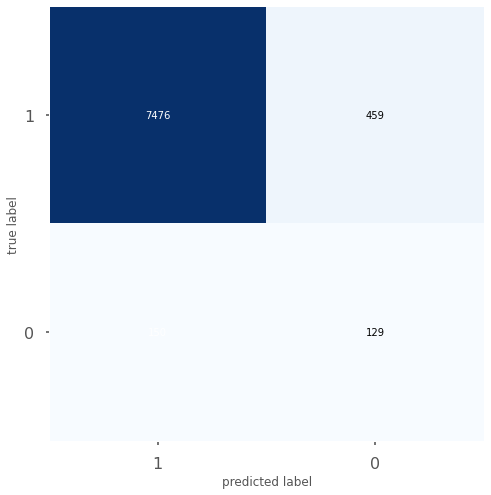

Horror
accuracy: 0.9252495738982226 precision: 0.6595289079229122 recall: 0.6754385964912281 f1: 0.6673889490790899


<Figure size 921.6x633.6 with 0 Axes>

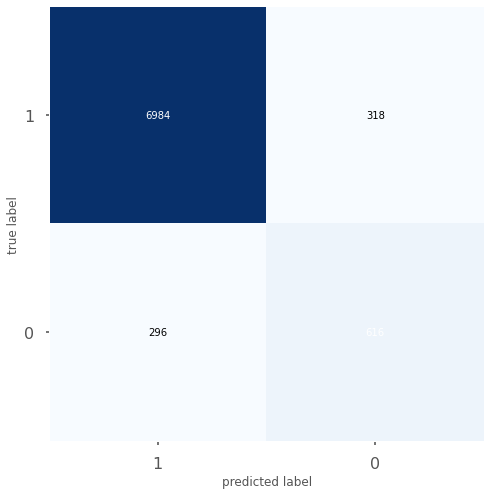

Music
accuracy: 0.9634769905040176 precision: 0.47417840375586856 recall: 0.3494809688581315 f1: 0.40239043824701204


<Figure size 921.6x633.6 with 0 Axes>

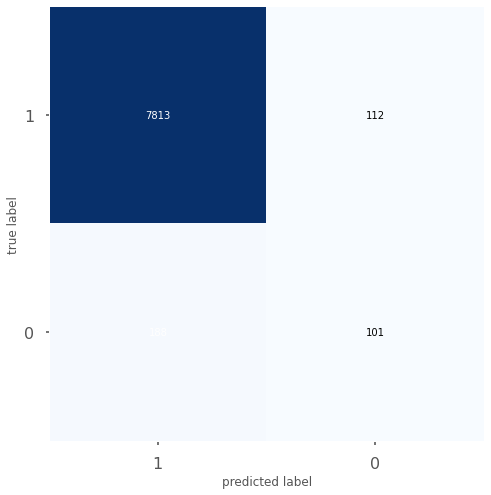

Mystery
accuracy: 0.9100316532748965 precision: 0.3153724247226624 recall: 0.3932806324110672 f1: 0.3500439753737907


<Figure size 921.6x633.6 with 0 Axes>

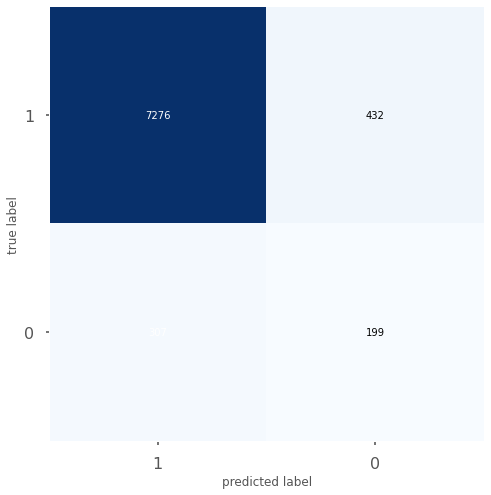

Romance
accuracy: 0.8447772096420745 precision: 0.48957464553794827 recall: 0.4696 f1: 0.47937933850551245


<Figure size 921.6x633.6 with 0 Axes>

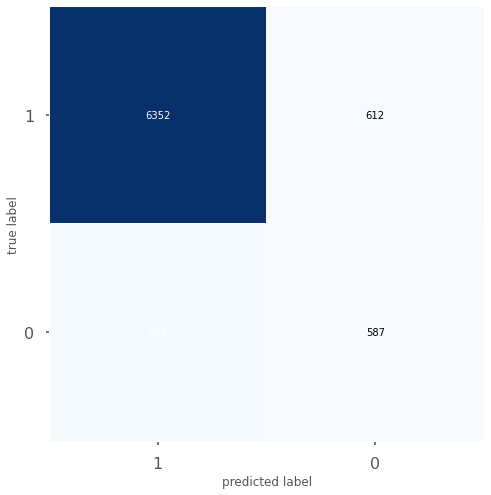

Science Fiction
accuracy: 0.9430241051862673 precision: 0.6633858267716536 recall: 0.5315457413249212 f1: 0.5901926444833626


<Figure size 921.6x633.6 with 0 Axes>

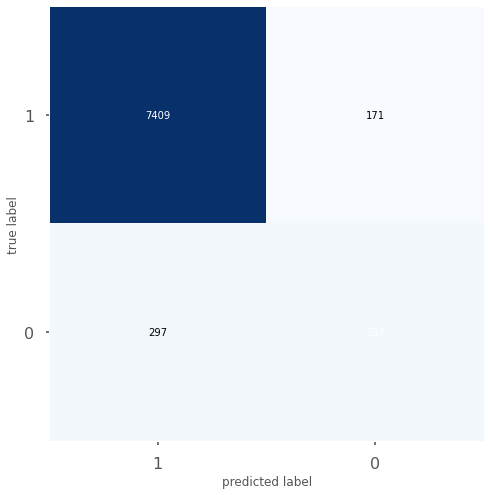

Thriller
accuracy: 0.8310202093985878 precision: 0.5215827338129496 recall: 0.5958904109589042 f1: 0.5562659846547315


<Figure size 921.6x633.6 with 0 Axes>

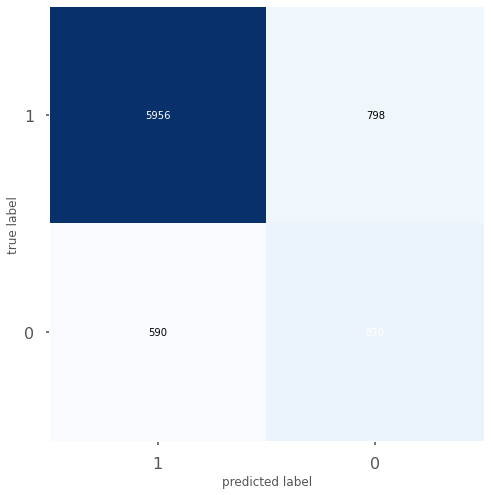

War
accuracy: 0.9666423179936694 precision: 0.4627831715210356 recall: 0.5697211155378487 f1: 0.5107142857142858


<Figure size 921.6x633.6 with 0 Axes>

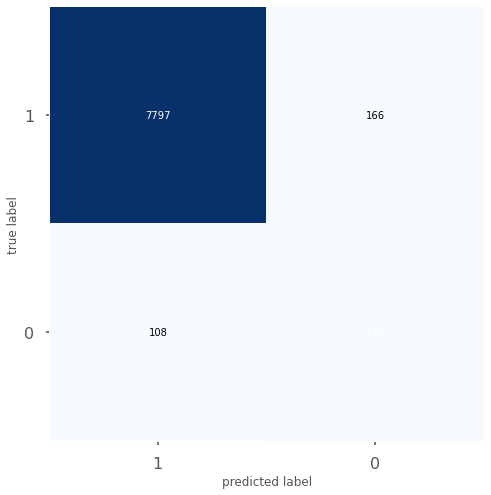

Western
accuracy: 0.9803993182371561 precision: 0.6666666666666666 recall: 0.5814977973568282 f1: 0.6211764705882352


<Figure size 921.6x633.6 with 0 Axes>

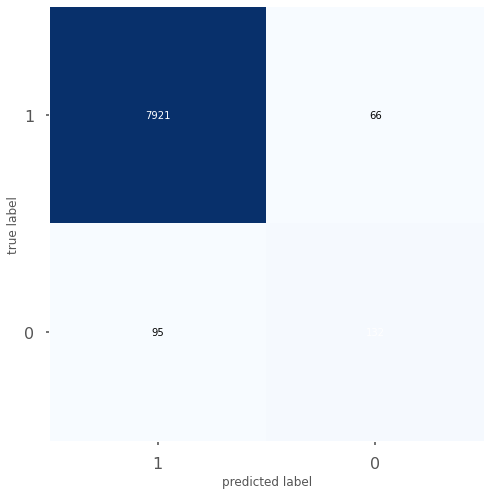

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

accuracy_per_class = []
precision_per_class = []
recall_per_class = []
f1_per_class = []
classes = list(mlb.classes_)
for i in range(labels.shape[0]):
  # print(len(labels[i, :]), len(preds[i, :]))
  accuracy_per_class.append(accuracy_score(labels[i, :], preds[i, :]))
  precision_per_class.append(precision_score(labels[i, :], preds[i, :]))
  recall_per_class.append(recall_score(labels[i, :], preds[i, :]))
  f1_per_class.append(f1_score(labels[i, :], preds[i, :]))
  print(classes[i])
  print("accuracy:", accuracy_per_class[i], "precision:", precision_per_class[i],
        "recall:", recall_per_class[i], "f1:", f1_per_class[i])
  cm  = confusion_matrix(labels[i, :], preds[i, :])
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
  plt.xticks(range(2), ['1', '0'], fontsize=16)
  plt.yticks(range(2), ['1', '0'], fontsize=16)
  plt.show()

In [ ]:
print("Acc:", np.mean(accuracy_per_class), "Precision:", np.mean(precision_per_class), "Recall:",
      np.mean(recall_per_class), "f1:", np.mean(f1_per_class))

Acc: 0.8955306658009362 Precision: 0.5083886877013445 Recall: 0.5597389648150766 f1: 0.5225770066836893
